# Exemple simple de regression linéaire

## 1. Importation des librairies

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# Cause we want our plots to appear in the notebook
from time import time

import warnings
#warnings.filterwarnings('ignore')

## 2. Définition des données d'apprentissage

In [3]:
a = 0.1
b = -0.5
X = np.arange(0, 1, 0.05)
Y_gt = a*X + b
Y = Y_gt + np.random.uniform(-0.02, 0.02, X.shape)
X.shape, Y.shape

((20,), (20,))

## 3. Architecture du réseau 

In [4]:
linear_model = tf.keras.models.Sequential()
# une première couche avec un neurone (couche cachée)
linear_model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

## Définition des paramètres d'apprentissage
# On choisit la méthode d'optimisation
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# On compile le graphe en précisant le nom fonction de coût utlisée
linear_model.compile(sgd, loss='mean_squared_error', metrics=['mean_absolute_error'])

## 4. Apprentissage du réseau

In [5]:
# On commence l'apprentissage à proprement parler
linear_model.fit(X, Y, batch_size=1, epochs=50, shuffle='True')

Epoch 1/50
20/20 [==============================] - 0s 840us/step - loss: 0.2111 - mean_absolute_error: 0.4108
Epoch 2/50
20/20 [==============================] - 0s 945us/step - loss: 0.1291 - mean_absolute_error: 0.3137
Epoch 3/50
20/20 [==============================] - 0s 1ms/step - loss: 0.0547 - mean_absolute_error: 0.1975
Epoch 4/50
20/20 [==============================] - 0s 1ms/step - loss: 0.0323 - mean_absolute_error: 0.1494
Epoch 5/50
20/20 [==============================] - 0s 1ms/step - loss: 0.0127 - mean_absolute_error: 0.0982
Epoch 6/50
20/20 [==============================] - 0s 892us/step - loss: 0.0068 - mean_absolute_error: 0.0693
Epoch 7/50
20/20 [==============================] - 0s 1ms/step - loss: 0.0035 - mean_absolute_error: 0.0496
Epoch 8/50
20/20 [==============================] - 0s 1ms/step - loss: 0.0019 - mean_absolute_error: 0.0357
Epoch 9/50
20/20 [==============================] - 0s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0262
Epoch 10/50
2

In [10]:
# Affichage du paramètres du reseau après l'apprentissage
# Qu'observez vous ?
weights = linear_model.layers[0].get_weights()
print(weights)

# for layer in linear_model.layers:
#     print(layer.get_weights())

[array([[0.09713817]], dtype=float32), array([-0.5030076], dtype=float32)]


## 5. Prédiction par le réseau

In [18]:
Y_pred = linear_model.predict(X)

1/1 [==============================] - 0s 27ms/step


## 6. Visualisation des résultats

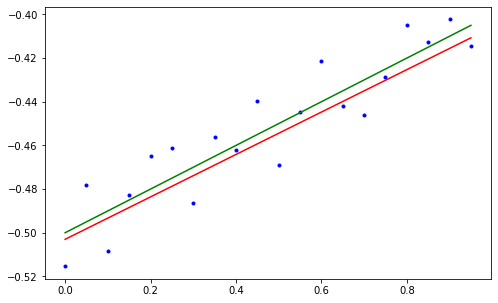

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(X, Y, '.b')
plt.plot(X, Y_pred, 'r')
plt.plot(X, Y_gt, 'g')
plt.show()

## A faire

- Observer la robustesse du modèle en faisant varier l'intensité du bruit sur les exemples
- Observer le résultat de l'apprentissage pour d'autres fonctions affines